Imports

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

MNIST Fashion dataset

We use 60,000 images for training and 10,000 images for testing

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  #looking at 1 pixel

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

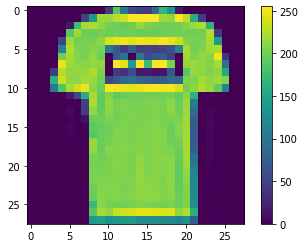

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [ ]:
train_images=train_images/255
test_images=test_images/255

Building the Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),              # input layer 
    keras.layers.Dense(128, activation='relu'),              # hidden layer
    keras.layers.Dense(10, activation='softmax')             # output layer
])

Training the model

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4950 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Evaluating the model

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print("Test accuracy :",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8842
Test accuracy : 0.8841999769210815


Making predictions

In [ ]:
predictions = model.predict(test_images)
print(predictions)

[[5.6263305e-09 4.8083360e-09 4.3141165e-07 ... 1.0943823e-02
  4.4010176e-07 9.8856759e-01]
 [5.8950932e-06 2.1123292e-10 9.9894124e-01 ... 9.6775293e-16
  1.4504091e-09 4.1251412e-11]
 [9.8986895e-11 1.0000000e+00 9.1889994e-13 ... 2.9686825e-25
  1.6767368e-15 1.6059814e-24]
 ...
 [6.7603137e-06 2.1989863e-10 1.4678334e-06 ... 3.1152483e-10
  9.9997663e-01 6.1830998e-13]
 [2.6414527e-08 9.9997389e-01 1.6007408e-09 ... 1.8290274e-13
  6.9130829e-10 2.0378603e-13]
 [7.9162355e-06 2.2763059e-08 6.7083765e-06 ... 3.1628397e-03
  2.1301486e-04 2.9173978e-05]]


In [ ]:
print(np.argmax(predictions[0]))   # prediction for 1st image on the testing dataset
# plt.imshow(test_images[0])

9
